# Ensemble Methods 

Ensemble methods are machine learning techniques that combine multiple models (often referred to as "weak learners") to create a stronger predictive model. They aim to improve the accuracy and robustness of predictions by leveraging the strengths of individual models while mitigating their weaknesses.

---

## Types of Ensemble Methods

1. **Bagging (Bootstrap Aggregating)**:
   - Reduces variance by training multiple models on different subsets of the data and averaging their predictions (for regression) or using majority voting (for classification).
   - Example: Random Forest.

2. **Boosting**:
   - Reduces bias by sequentially training models, where each model tries to correct the errors of its predecessor.
   - Example: Gradient Boosting, AdaBoost.

3. **Stacking**:
   - Combines predictions from multiple models using another model (meta-learner) to make the final prediction.

---

## Boosting

Boosting is a sequential ensemble technique where models are trained iteratively to correct the errors of the previous models. It focuses on difficult-to-predict data points, giving more weight to them in subsequent iterations.

### How Boosting Works

1. **Initialization**:
   - Start with a weak learner (e.g., a shallow decision tree).
   - Assign equal weights to all training samples.

2. **Iterative Model Building**:
   - Train a model on the training data.
   - Identify misclassified samples and increase their weights (or residual errors in regression).
   - Train the next model to focus on these errors.

3. **Final Prediction**:
   - Combine the predictions of all models, typically using weighted voting (classification) or weighted average (regression).

---

### Popular Boosting Algorithms

1. **AdaBoost (Adaptive Boosting)**:
   - Focuses on misclassified samples by adjusting their weights.
   - Combines predictions using weighted majority voting.

   **Mathematical Summary**:
   - Weight update for a sample: \( w_i^{(t+1)} = w_i^{(t)} \cdot e^{\alpha_t \cdot \text{error}(x_i)} \)
   - Final prediction: \( \text{sign} \left( \sum_{t} \alpha_t \cdot h_t(x) \right) \)

2. **Gradient Boosting**:
   - Uses gradient descent to minimize the loss function.
   - Fits new models to the residuals (errors) of previous models.

   **Steps**:
   - Initialize a base model with a prediction (e.g., the mean for regression).
   - Fit subsequent models on the residuals.
   - Combine all models’ predictions to reduce errors.

3. **XGBoost**:
   - An optimized version of Gradient Boosting.
   - Features include regularization, parallel computation, and handling of missing values.

4. **LightGBM**:
   - Boosting algorithm optimized for speed and efficiency.
   - Uses histogram-based techniques to reduce computation time.

5. **CatBoost**:
   - Specifically designed to handle categorical features effectively.
   - Avoids the need for extensive preprocessing (like one-hot encoding).

---

### Advantages of Boosting

- **High Accuracy**: Boosting often outperforms other algorithms in competitions and real-world applications.
- **Flexibility**: Can be applied to various types of data and tasks.
- **Feature Selection**: Automatically assigns importance to features.

---

### Disadvantages of Boosting

- **Overfitting**: Can overfit noisy datasets if not regularized properly.
- **Computational Cost**: Training multiple models sequentially can be time-consuming.
- **Hyperparameter Tuning**: Requires careful tuning of parameters like the learning rate, number of estimators, and tree depth.

---




## Importing Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

## Create Functions

In [2]:


def prepare_data(file_path):
    """Prepare the wine quality data with proper encoding and scaling."""
    data = pd.read_csv(file_path, sep=';')
    X = data.drop('quality', axis=1)
    y = data['quality']
    
    # Bin quality scores into categories
    y = pd.cut(y, bins=[0, 5, 7, 10], labels=['low', 'medium', 'high'])
    
    # Encode labels
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    return X_scaled, y

def evaluate_model(model, X_test, y_test):
    """Evaluate model with proper handling of edge cases."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Handle zero division in classification report
    report = classification_report(
        y_test, 
        y_pred,
        zero_division=0,  # Handle zero division cases
        output_dict=True  # Get dictionary output for better handling
    )
    
    return y_pred, accuracy, report

def plot_learning_curves(model, X_train, y_train, title):
    """Plot learning curves with error handling."""
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label='Cross-validation score')
    plt.fill_between(train_sizes, 
                    np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                    np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), 
                    alpha=0.1)
    plt.fill_between(train_sizes, 
                    np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
                    np.mean(val_scores, axis=1) + np.std(val_scores, axis=1), 
                    alpha=0.1)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curves - {title}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def plot_confusion_matrices(results, y_test):
    """Plot confusion matrices with improved visualization."""
    fig, axes = plt.subplots(1, len(results), figsize=(15, 5))
    fig.suptitle('Confusion Matrices for Each Model')
    
    for idx, (name, result) in enumerate(results.items()):
        cm = confusion_matrix(y_test, result['predictions'])
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
        axes[idx].set_title(f'{name}\nAccuracy: {result["test_accuracy"]:.3f}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('True')
    
    plt.tight_layout()
    plt.show()


## Main Execution Train and evaluate models


Training Random Forest...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


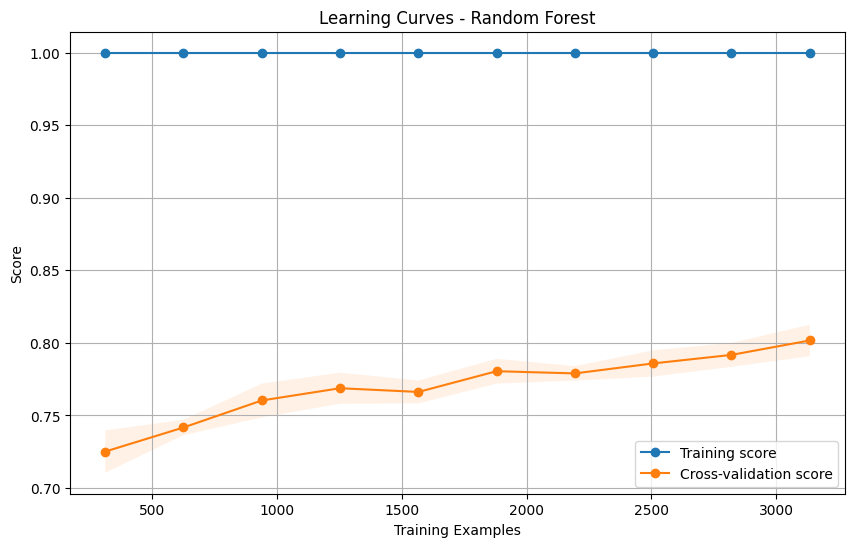


Random Forest Results:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Cross-validation Score: 0.8019
Test Accuracy: 0.8265

Classification Report:
              precision    recall  f1-score     support
0              1.000000  0.361111  0.530612   36.000000
1              0.803390  0.722561  0.760835  328.000000
2              0.833333  0.909091  0.869565  616.000000
accuracy       0.826531  0.826531  0.826531    0.826531
macro avg      0.878908  0.664254  0.720337  980.000000
weighted avg   0.829434  0.826531  0.820722  980.000000

Training XGBoost...
Error training XGBoost: 'super' object has no attribute '__sklearn_tags__'

Training AdaBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


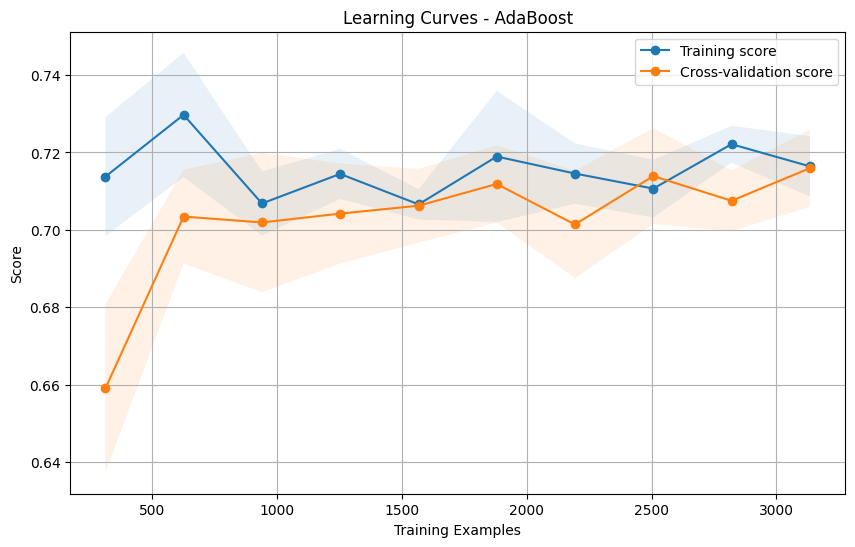


AdaBoost Results:
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Cross-validation Score: 0.7162
Test Accuracy: 0.6949

Classification Report:
              precision    recall  f1-score     support
0              0.000000  0.000000  0.000000   36.000000
1              0.610345  0.539634  0.572816  328.000000
2              0.730435  0.818182  0.771822  616.000000
accuracy       0.694898  0.694898  0.694898    0.694898
macro avg      0.446927  0.452605  0.448213  980.000000
weighted avg   0.663409  0.694898  0.676863  980.000000


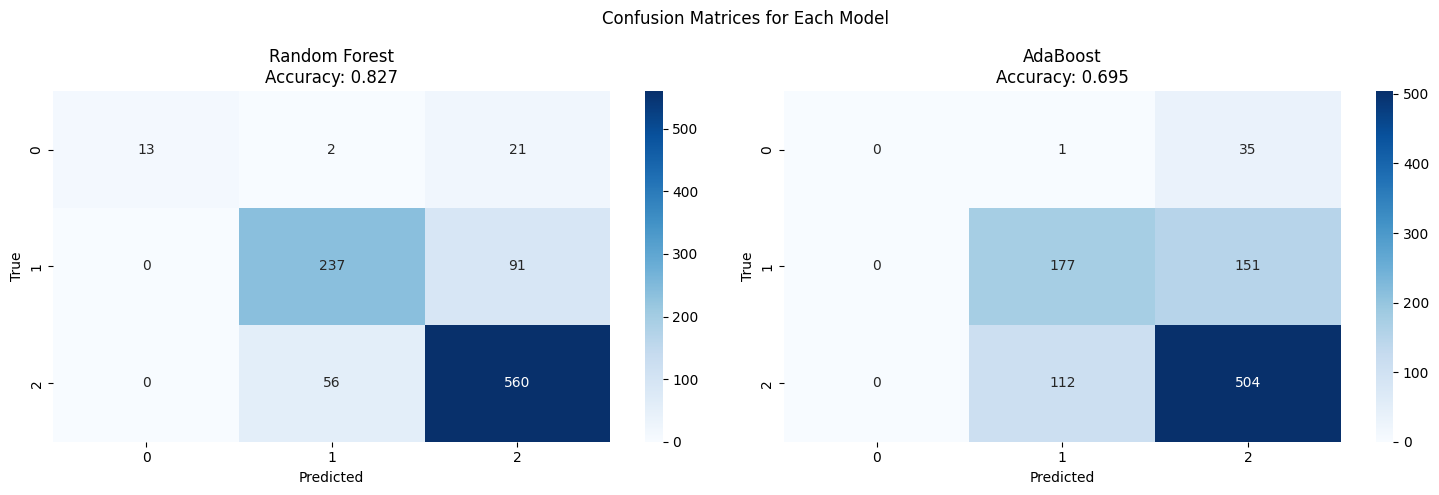

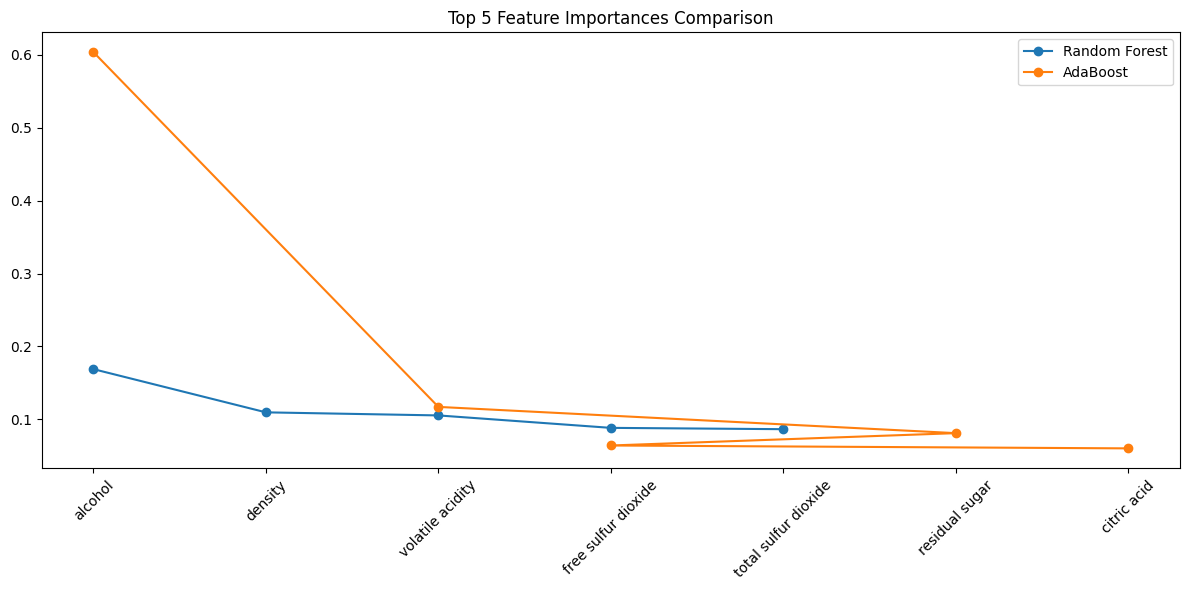

In [3]:
# Main execution
try:
    # Prepare data
    X, y = prepare_data('winequality-white.csv')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Initialize models with updated parameters
    models = {
        'Random Forest': RandomForestClassifier(
            random_state=42,
            class_weight='balanced'
        ),
        'XGBoost': XGBClassifier(
            random_state=42,
            objective='multi:softprob',
            num_class=3,
            eval_metric='mlogloss',
            use_label_encoder=False
        ),
        'AdaBoost': AdaBoostClassifier(
            random_state=42
        )
    }
    
    # Updated parameter grids
    param_grids = {
        'Random Forest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5]
        },
        'XGBoost': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.01],
            'max_depth': [3, 5]
        },
        'AdaBoost': {
            'n_estimators': [50, 100],
            'learning_rate': [1.0, 0.1]
        }
    }
    
    results = {}
    
    # Train and evaluate models
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        try:
            # Grid search with stratified k-fold
            grid_search = GridSearchCV(
                model, 
                param_grids[name], 
                cv=5, 
                scoring='accuracy', 
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(X_train, y_train)
            
            best_model = grid_search.best_estimator_
            
            # Evaluate model
            y_pred, accuracy, report = evaluate_model(best_model, X_test, y_test)
            
            # Store results
            results[name] = {
                'model': best_model,
                'best_params': grid_search.best_params_,
                'cv_mean': grid_search.best_score_,
                'test_accuracy': accuracy,
                'predictions': y_pred,
                'report': report
            }
            
            # Feature importances
            if hasattr(best_model, 'feature_importances_'):
                results[name]['feature_importances'] = pd.DataFrame({
                    'feature': X.columns,
                    'importance': best_model.feature_importances_
                }).sort_values('importance', ascending=False)
            
            # Plot learning curves
            plot_learning_curves(best_model, X_train, y_train, name)
            
            # Print detailed results
            print(f"\n{name} Results:")
            print(f"Best Parameters: {grid_search.best_params_}")
            print(f"Cross-validation Score: {grid_search.best_score_:.4f}")
            print(f"Test Accuracy: {accuracy:.4f}")
            print("\nClassification Report:")
            print(pd.DataFrame(report).transpose())
            
        except Exception as e:
            print(f"Error training {name}: {str(e)}")
            continue
    
    # Visualizations
    if results:
        # Confusion matrices
        plot_confusion_matrices(results, y_test)
        
        # Feature importance comparison
        plt.figure(figsize=(12, 6))
        for name, result in results.items():
            if 'feature_importances' in result:
                importances = result['feature_importances']
                plt.plot(
                    importances['feature'][:5],
                    importances['importance'][:5],
                    'o-',
                    label=name
                )
        
        plt.title('Top 5 Feature Importances Comparison')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"An error occurred: {str(e)}")

# Ensemble Model Analysis Results: Wine Quality Dataset

## Random Forest
- **Best Parameters**: `{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}`
- **Cross-Validation Mean Accuracy**: `0.8019`
- **Test Accuracy**: `0.8265`

### Classification Report:
| Class   | Precision | Recall  | F1-Score | Support |
|---------|-----------|---------|----------|---------|
| 0 (Low) | 1.0000    | 0.3611  | 0.5306   | 36      |
| 1 (Med) | 0.8034    | 0.7226  | 0.7608   | 328     |
| 2 (High)| 0.8333    | 0.9091  | 0.8696   | 616     |

- **Overall Accuracy**: `0.8265`
- **Macro Average**:
  - Precision: `0.8789`
  - Recall: `0.6643`
  - F1-Score: `0.7203`
- **Weighted Average**:
  - Precision: `0.8294`
  - Recall: `0.8265`
  - F1-Score: `0.8207`
---
## Key Insights
- **Random Forest** is currently the most performant model with a test accuracy of 82.55%.
- It identifies **Residual Sugar** and **Volatile Acidity** as the most critical features in predicting wine quality